In [1]:
import pandas as pd
import numpy as np
import h5py
from sklearn.model_selection import train_test_split

In [2]:
f_train = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_train_data.hdf', 'r')
f_test = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_test_data.hdf', 'r')

In [ ]:
print(f_train.keys())
print(f_train.attrs.keys())

print(f_train['prod_train_data'].keys())
print(f_train['prod_train_data']['axis0'])

In [ ]:
with f_train as file:
    for key in file['prod_train_data'].keys():
        print('\n', key)
        # Access the dataset
        dataset = file['prod_train_data'][key]
        
        # Read the dataset into a numpy array
        data = dataset[:]
        print(data.shape)
        
        # # Since the dataset contains strings of fixed length, you can decode the bytes
        # # Convert bytes to strings
        # if key in ['axis0', 'block0_items', 'block1_items']:
        #     strings = [x.decode('utf-8').strip() for x in data]
        
        #     # Print the strings
        #     for s in strings:
        #         print(s)
        # else:
        #     print(data)

In [ ]:
with f_test as file:
    for key in file['prod_test_data'].keys():
        print('\n', key)
        # Access the dataset
        dataset = file['prod_test_data'][key]
        
        # Read the dataset into a numpy array
        data = dataset[:]
        print(data.shape)
        
        # # Since the dataset contains strings of fixed length, you can decode the bytes
        # # Convert bytes to strings
        # if key in ['axis0', 'block0_items', 'block1_items']:
        #     strings = [x.decode('utf-8').strip() for x in data]
        
        #     # Print the strings
        #     for s in strings:
        #         print(s)
        # else:
        #     print(data)

In [ ]:
label_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_train_label.csv')
label_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_test_label.csv')

In [ ]:
print(label_test.shape, label_train.shape)
print(label_train)
y_train = label_train['binary_anom']
print(y_train[y_train==1])
y_test = label_test['binary_anom']
print(y_test[y_test==1], '\n', len(y_test[y_test==1]))

In [ ]:
label = label_test
label['job_id'] = label['job_id'].astype('str')
label['component_id'] = label['component_id'].astype('str') 
label.set_index(['job_id', 'component_id'], inplace=True)

print(label)

### IEE-CIS fraud detection data set (from kaggle challenge 2019)

In [2]:
x_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_transaction.csv')
x_train2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_identity.csv')

In [ ]:
print(x_train.shape, x_train2.shape)
print(x_train.columns) #, x_train2.columns)

for i, name in enumerate(x_train.columns):
    print(name)
    # print(x_train[name].dtypes)

# Filter columns that are of type 'float'
float_cols = x_train.select_dtypes(include='float').columns
# print("Columns with float values:", float_cols)
# for i, name in enumerate(float_cols.columns):
#     print(name)

# Filter columns that are NOT of type 'float'
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)

In [ ]:
x_train = x_train.sort_values(by='TransactionDT')
x_train = x_train.drop(columns=non_num_cols)
y_train = x_train['isFraud']
x_train = x_train.drop(columns='isFraud')
print(x_train.shape, y_train.shape)

In [ ]:
x_train = x_train.fillna(0)
has_nan = y_train.isnull().any()
print(has_nan)
print(x_train.isnull().any())

In [ ]:
X = np.array(x_train)
y = np.array(y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from preprocess import normalize3
print(max(X_train[0]))
X_train, min_a, max_a = normalize3(X_train, min_a=None)
print(max(X_train[0]))
X_test, _, _ = normalize3(X_test, min_a, max_a)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for dim in range(5):
    x_t, l = X_train[:10000, dim], y_train[:10000]
    plt.figure(figsize=(10, 3))
    plt.plot(x_t, label='data')
    plt.plot(l, '--', linewidth=0.2)
    plt.fill_between(np.arange(l.shape[0]), l, color='tab:orange', alpha=0.3, label='Anomaly')
    plt.legend()
    plt.show()
    plt.close()



In [ ]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(y_train.shape, y_test.shape)

In [15]:
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/train_1.npy', X_train)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/test_1.npy', X_test)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/labels_1.npy', y_test)

In [ ]:
# x_train['day'] = x_train['TransactionDT'] / (24 * 60 * 60)  # to convert seconds to hours

In [ ]:
# x_train['uid1'] =  (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str)
# x_train['uid2'] =  (x_train.card1.astype(str) +'_' + \
#             x_train.addr1.astype(str) +'_' + \
#             (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str))

In [ ]:
# print(x_train['uid1'])
# print(x_train['uid1'].unique)
# print(x_train['uid2'])
# print(x_train['uid2'].unique)

In [ ]:
x_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_transaction.csv')
x_test2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_identity.csv')


In [ ]:
print(x_test.columns)
print(x_test.shape)

for i, name in enumerate(x_test.columns):
    print(name)

In [ ]:
x_train = pd.sort_values(by='')

### ATLAS time series data for AD in LAr data (from Vilius)

In [15]:
f = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/user.vcepaiti.38697672.EXT0._000002.AnnotatorNtuple.h5', 'r')
print(f.keys(), f.attrs.keys())
data = np.array(f['data'])
lumiblock = np.array(f['lb'])

<KeysViewHDF5 ['data', 'event_labels', 'event_numbers', 'features', 'lb', 'run']> <KeysViewHDF5 []>


In [16]:
print(data, data.shape, data[0].shape)

[[array([0.02481351, 0.02819117, 0.01431316, ..., 0.0109676 , 0.00847439,
         0.01213586], dtype=float32)
  array([0.11418702, 0.03730912, 0.04166295, ..., 0.02945039, 0.05045526,
         0.0290166 ], dtype=float32)
  array([-0.01582509, -0.01051754, -0.01256164, ..., -0.01969587,
          0.00463475,  0.01227009], dtype=float32)
  array([0.13442467, 0.07781276, 0.13664474, ..., 0.11049332, 0.09484948,
         0.13909546], dtype=float32)
  array([0.02701822, 0.01998957, 0.00117248, ..., 0.00870744, 0.0140507 ,
         0.03710645], dtype=float32)
  array([0.09692451, 0.0551714 , 0.01092287, ..., 0.02267274, 0.06942841,
         0.13418795], dtype=float32)
  array([-0.01878669, -0.03633149, -0.00806727, ..., -0.02654532,
         -0.0075148 , -0.00572758], dtype=float32)
  array([0.09573003, 0.1624279 , 0.02941945, ..., 0.09278487, 0.12533279,
         0.14162795], dtype=float32)
  array([0.05967129, 0.10824541, 0.02980348, ..., 0.02578227, 0.01145352,
         0.03612082], dtyp

In [17]:
print(f['event_labels'], f['event_numbers'], f['features'], f['run'])
evt_lb = np.array(f['event_labels'])
print(evt_lb, evt_lb[0].shape)
print(np.min(evt_lb[2]), np.max(evt_lb[2]))
print(np.unique(evt_lb[2]))
print(np.any(np.logical_and(evt_lb != 0, evt_lb !=2)))
evt_nb = np.array(f['event_numbers'])
print(evt_nb, evt_nb[0].shape)
features = np.array(f['features'])
print(features)
run = np.array(f['run'])
print(run)

<HDF5 dataset "event_labels": shape (5,), type "|O"> <HDF5 dataset "event_numbers": shape (5,), type "|O"> <HDF5 dataset "features": shape (16,), type "|O"> <HDF5 dataset "run": shape (5,), type "<i4">
[array([0, 0, 0, ..., 0, 0, 0], dtype=int32)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32)] (37826,)
0 3
[0 1 2 3]
True
[array([411301888, 411301978, 411302120, ..., 415882770, 415882772,
        415882794])
 array([415882881, 415882913, 415882921, ..., 417688691, 417688703,
        417688725])
 array([417688735, 417688771, 417688779, ..., 422273940, 422274033,
        422274056])
 array([422274138, 422274187, 422274209, ..., 426816762, 426816770,
        426817000])
 array([426817152, 426817160, 426817176, ..., 429670465, 429670563,
        429670591])                                                ] (37826,)
[b'EMBA_AveLARQ_mean' b'EMBA_AveLARQ_std' b'EM

/var/folders/mz/8xvqd9y134510qh2hy9fj_7c0000gn/T/ipykernel_84991/2219290606.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.any(np.logical_and(evt_lb != 0, evt_lb !=2)))


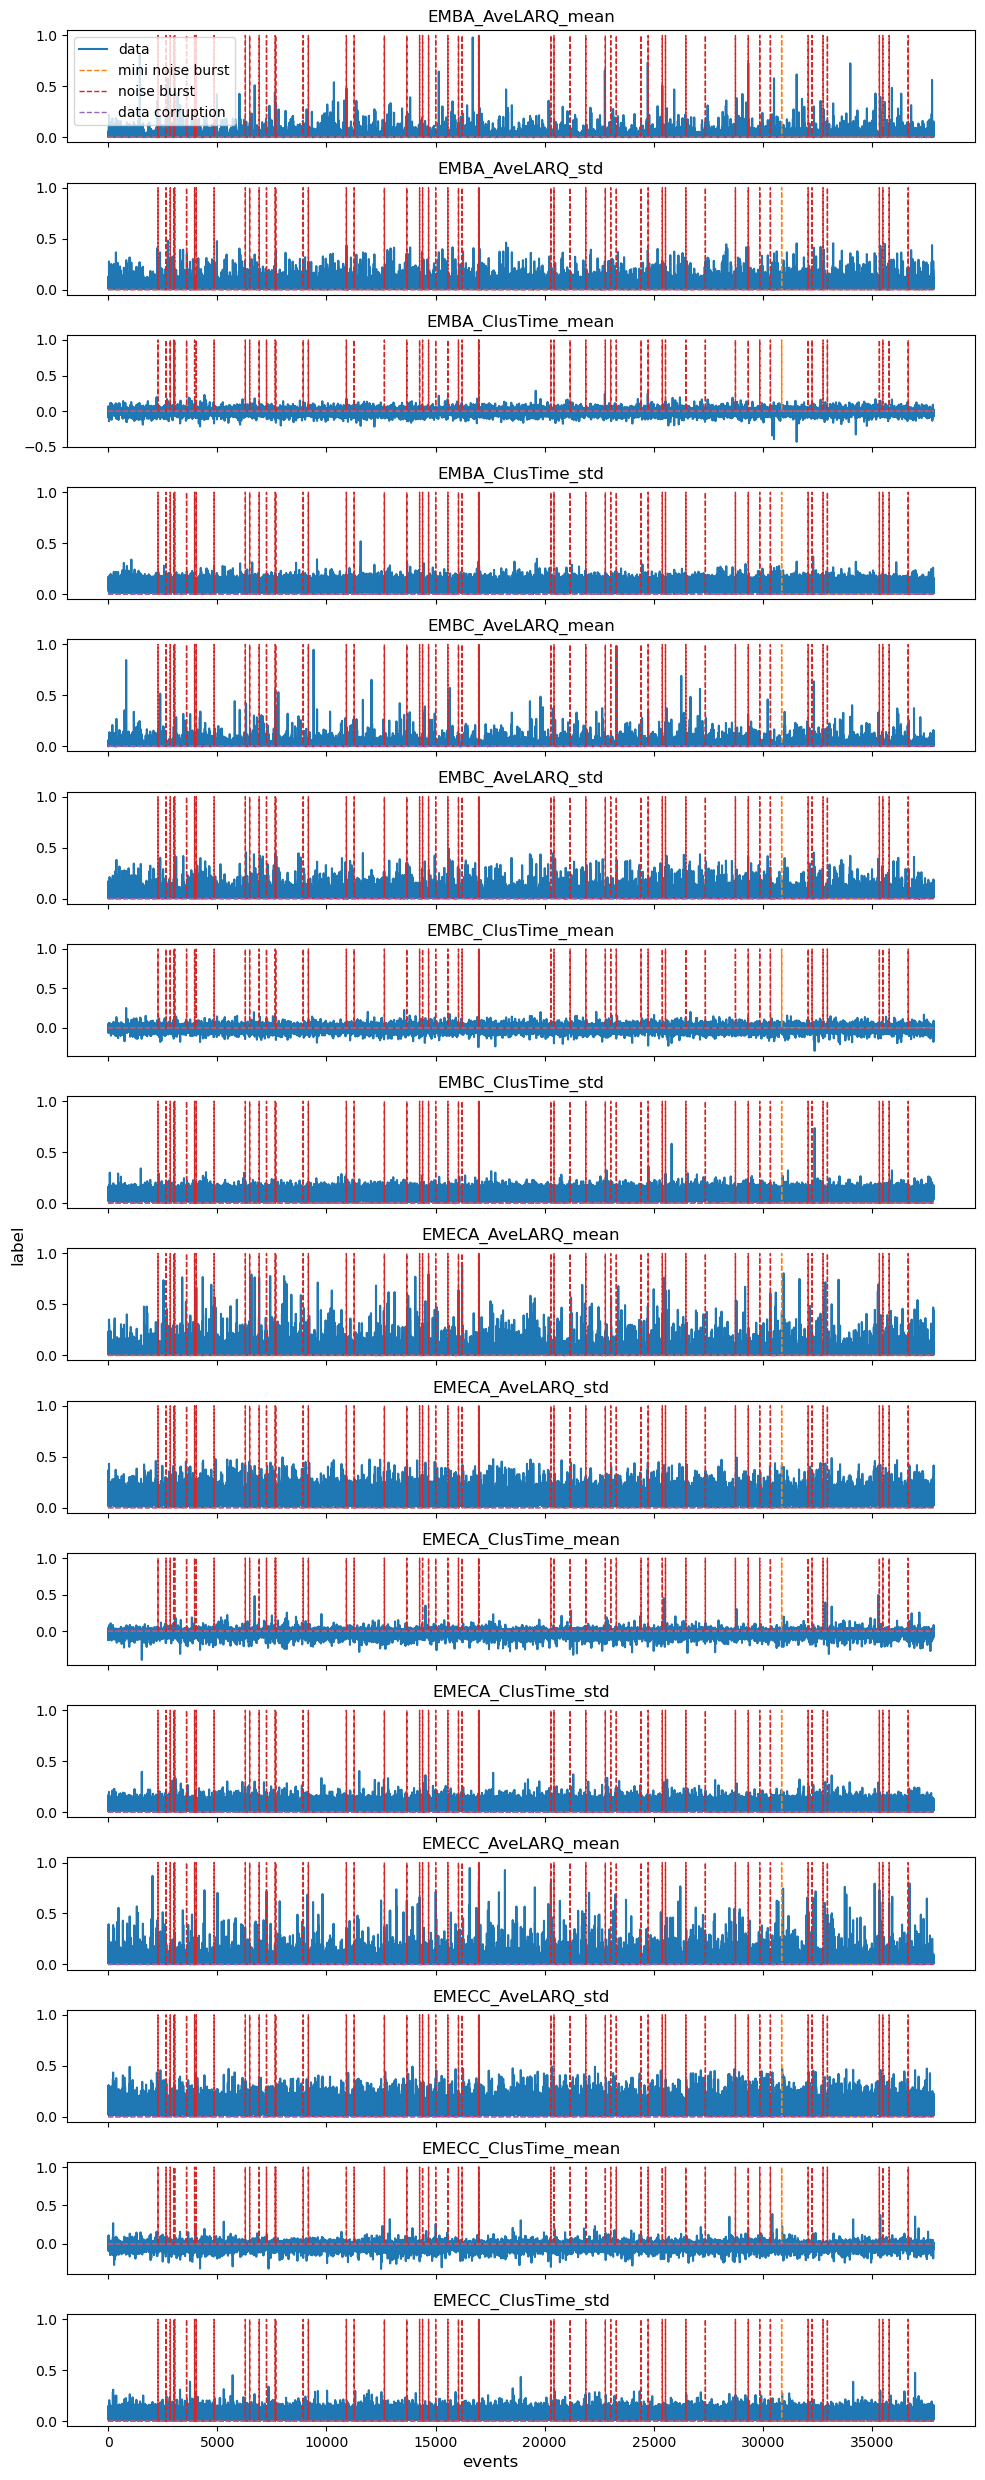

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for lb in range(5):  # iterate through lumiblocks
    fig, axs = plt.subplots(16, 1, figsize=(10, 25), sharex=True)

    for dim in range(16):  # iterate through 16 features we're using
        x_t = data[lb, dim]
        l = evt_lb[lb]
        l1 = (l==1) + 0
        l2 = (l==2) + 0
        l3 = (l==3) + 0
        # print(x_t.shape, x_t[0].shape)
        axs[dim].plot(x_t, label='data')
        axs[dim].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
        axs[dim].plot(l2, '--', linewidth=1, color='tab:red', label='noise burst')
        axs[dim].plot(l3, '--', linewidth=1, color='tab:purple', label='data corruption')
        axs[dim].set_title(str(features[dim])[2:-1])
    axs[0].legend()
    fig.supylabel('label')
    fig.supxlabel('events')
    plt.tight_layout()
    plt.show()
    plt.close()
    break



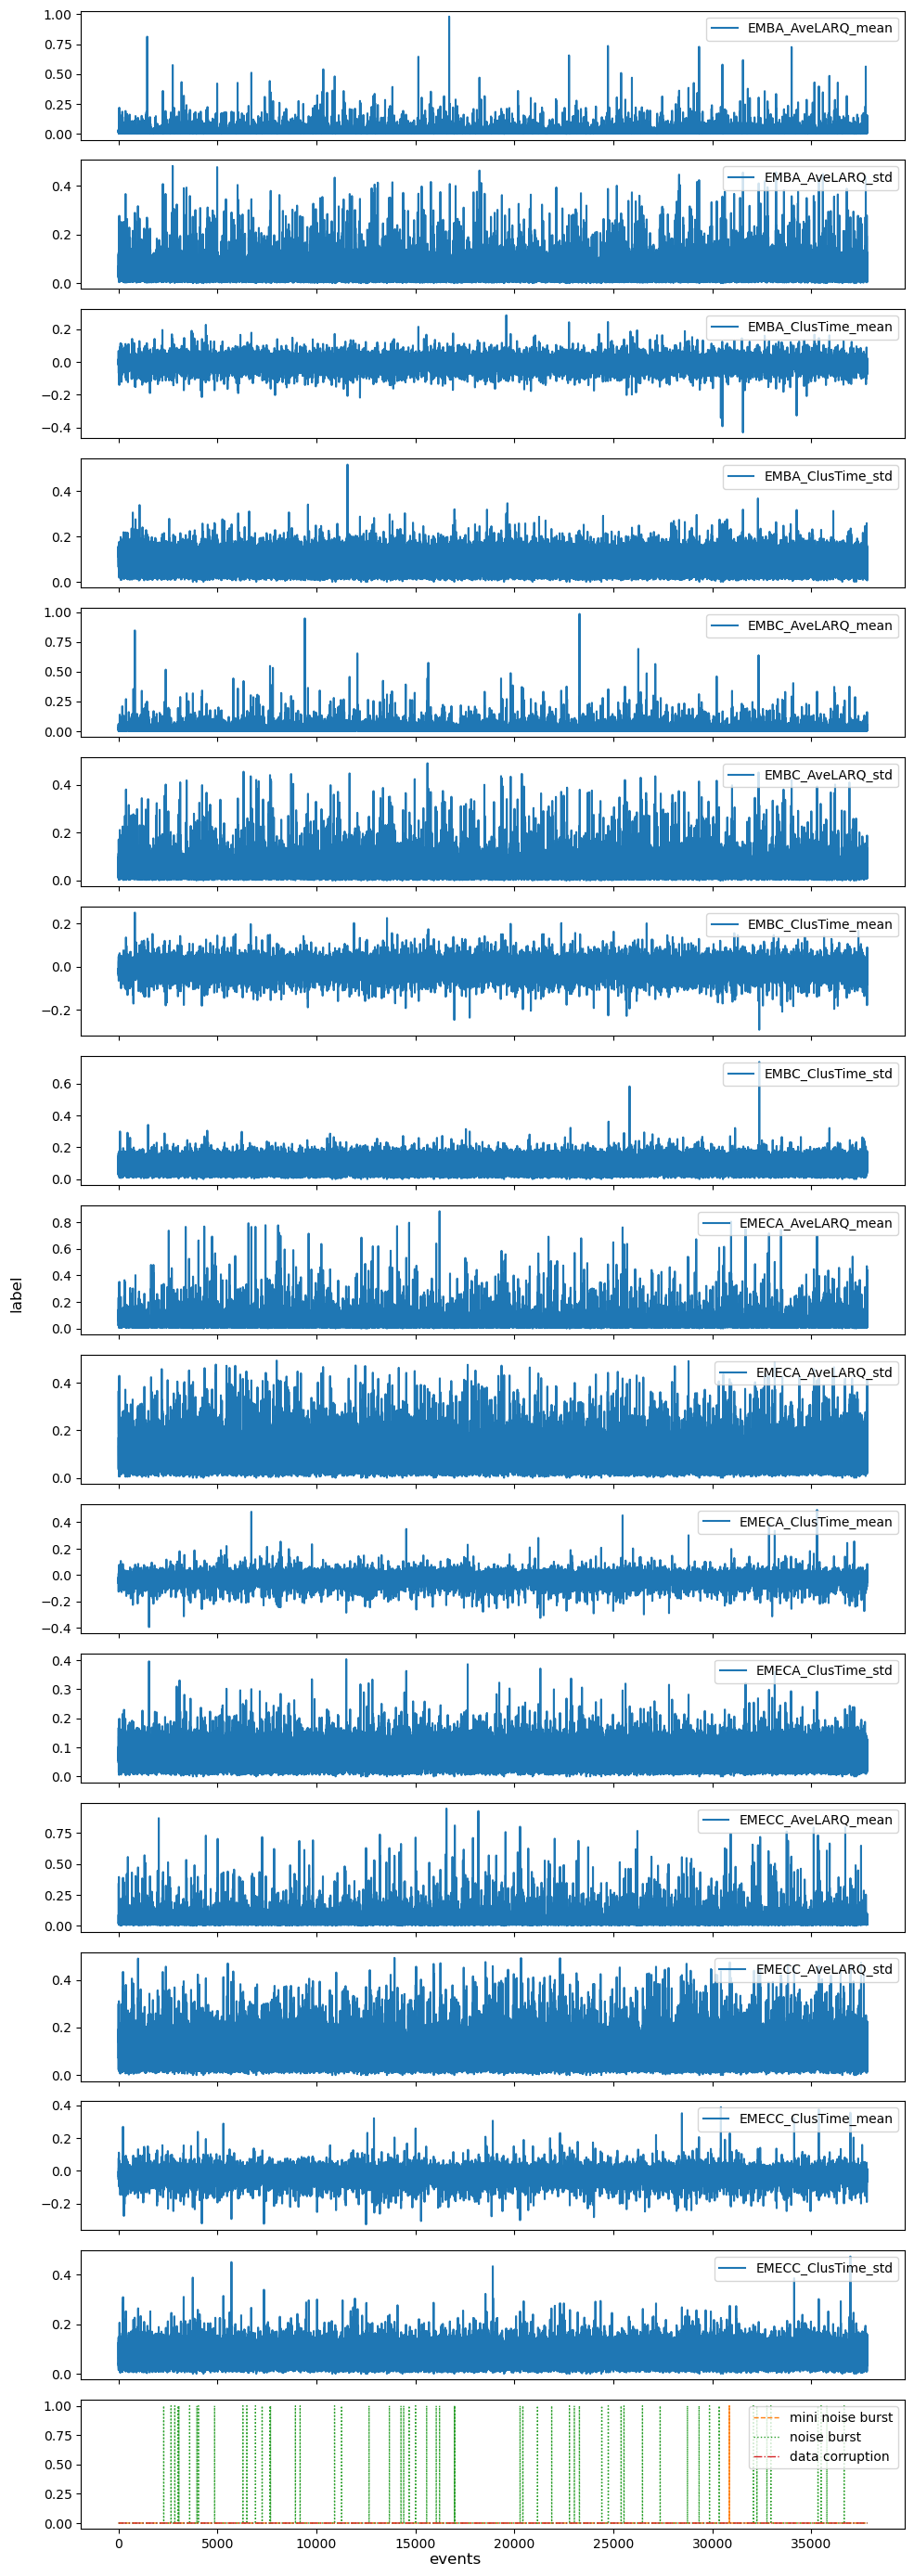

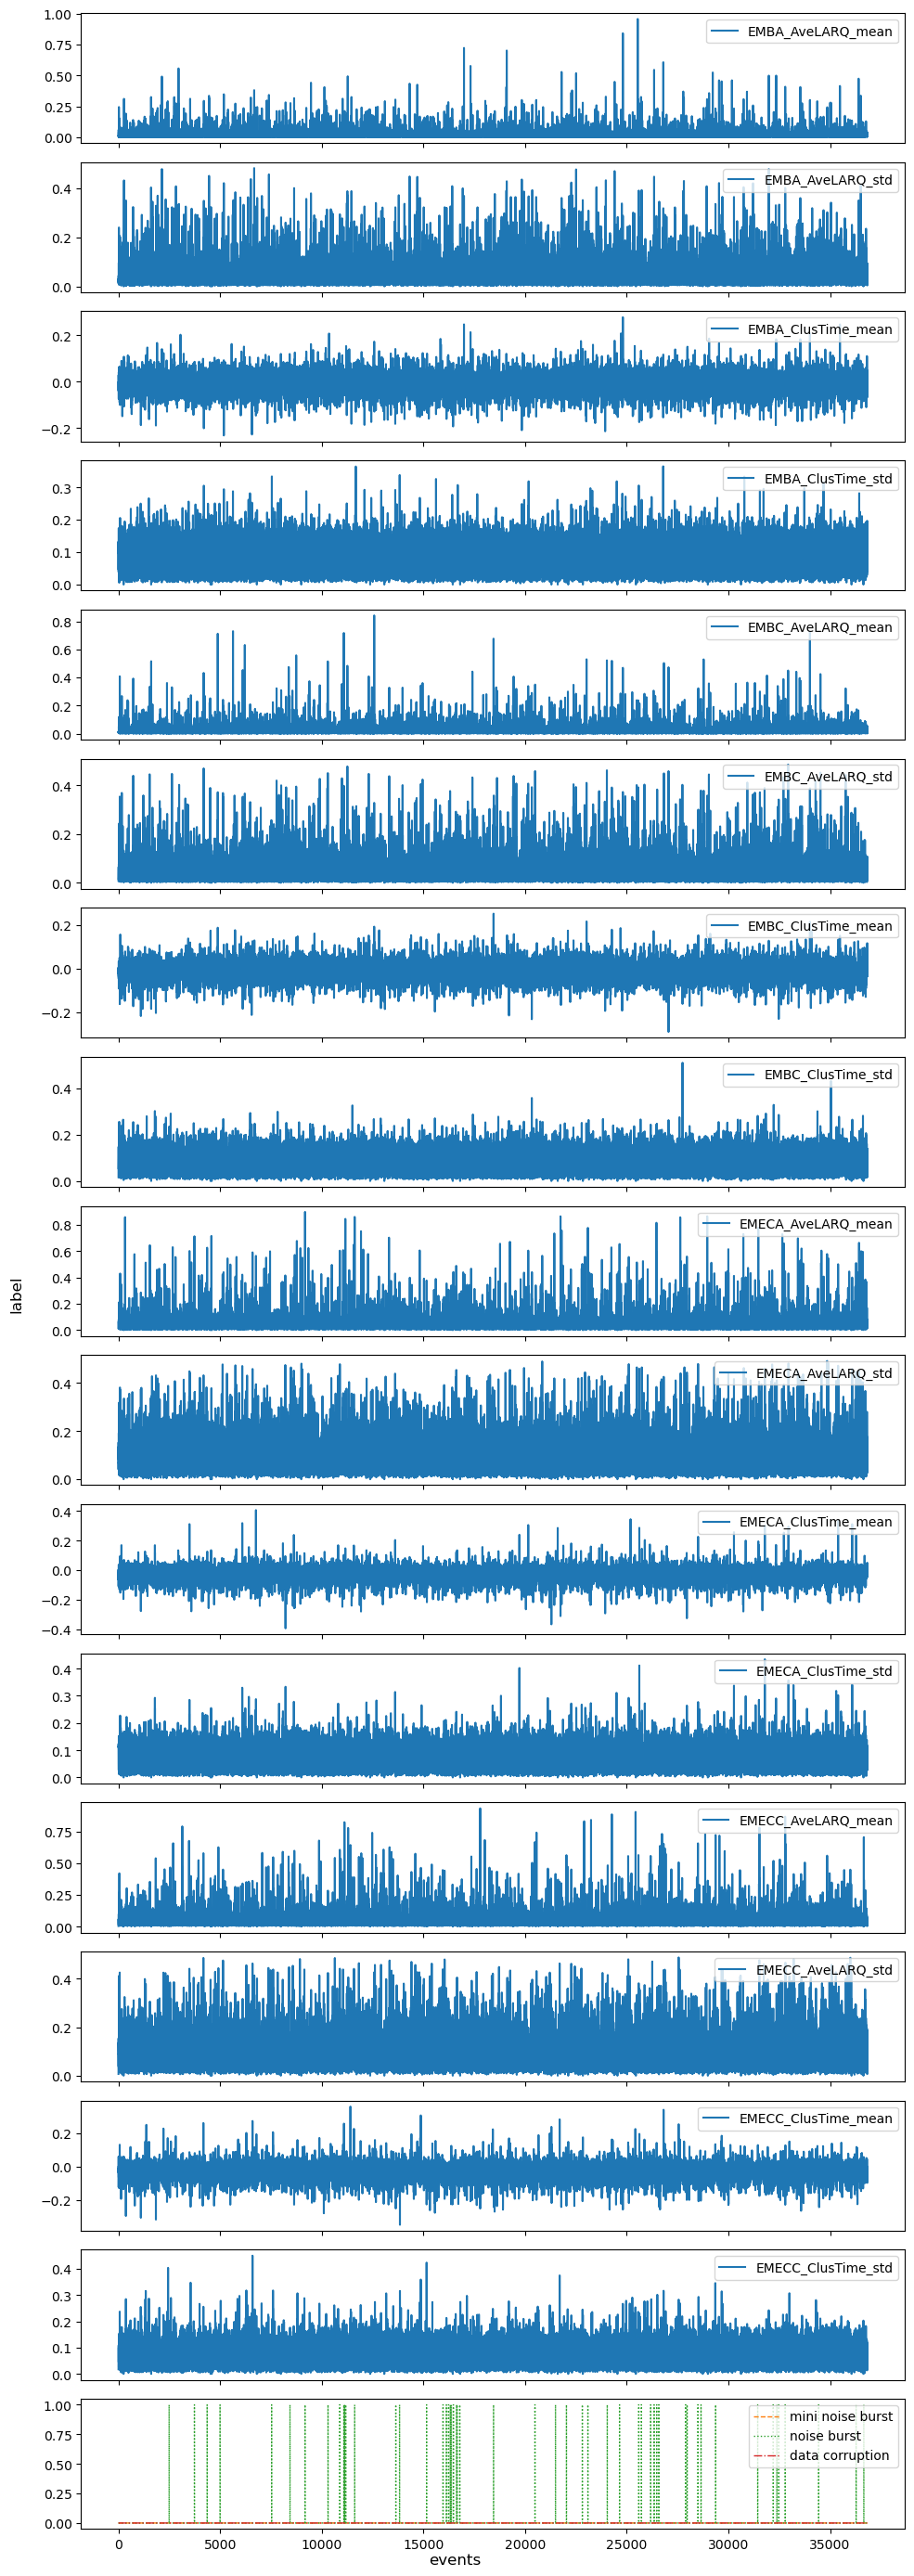

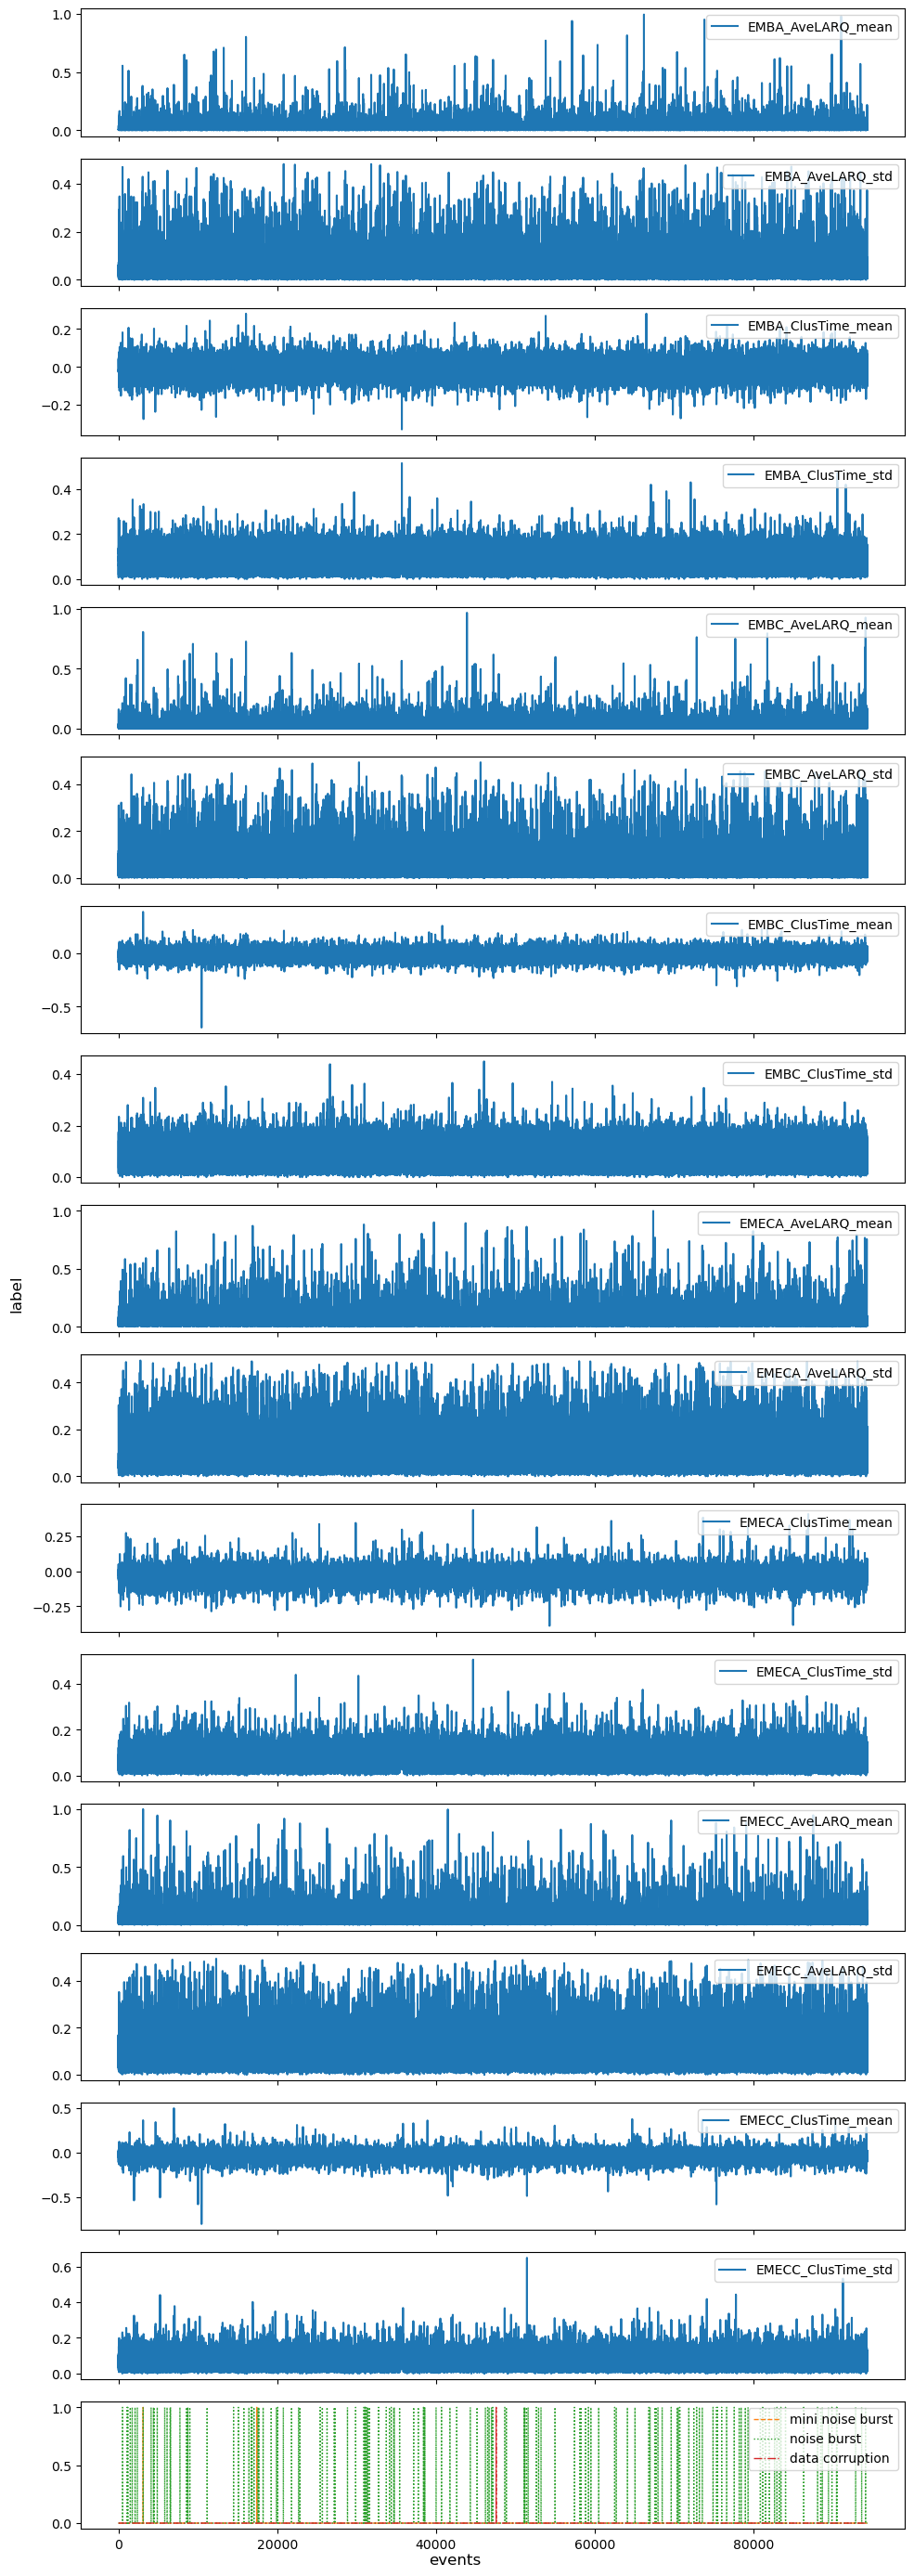

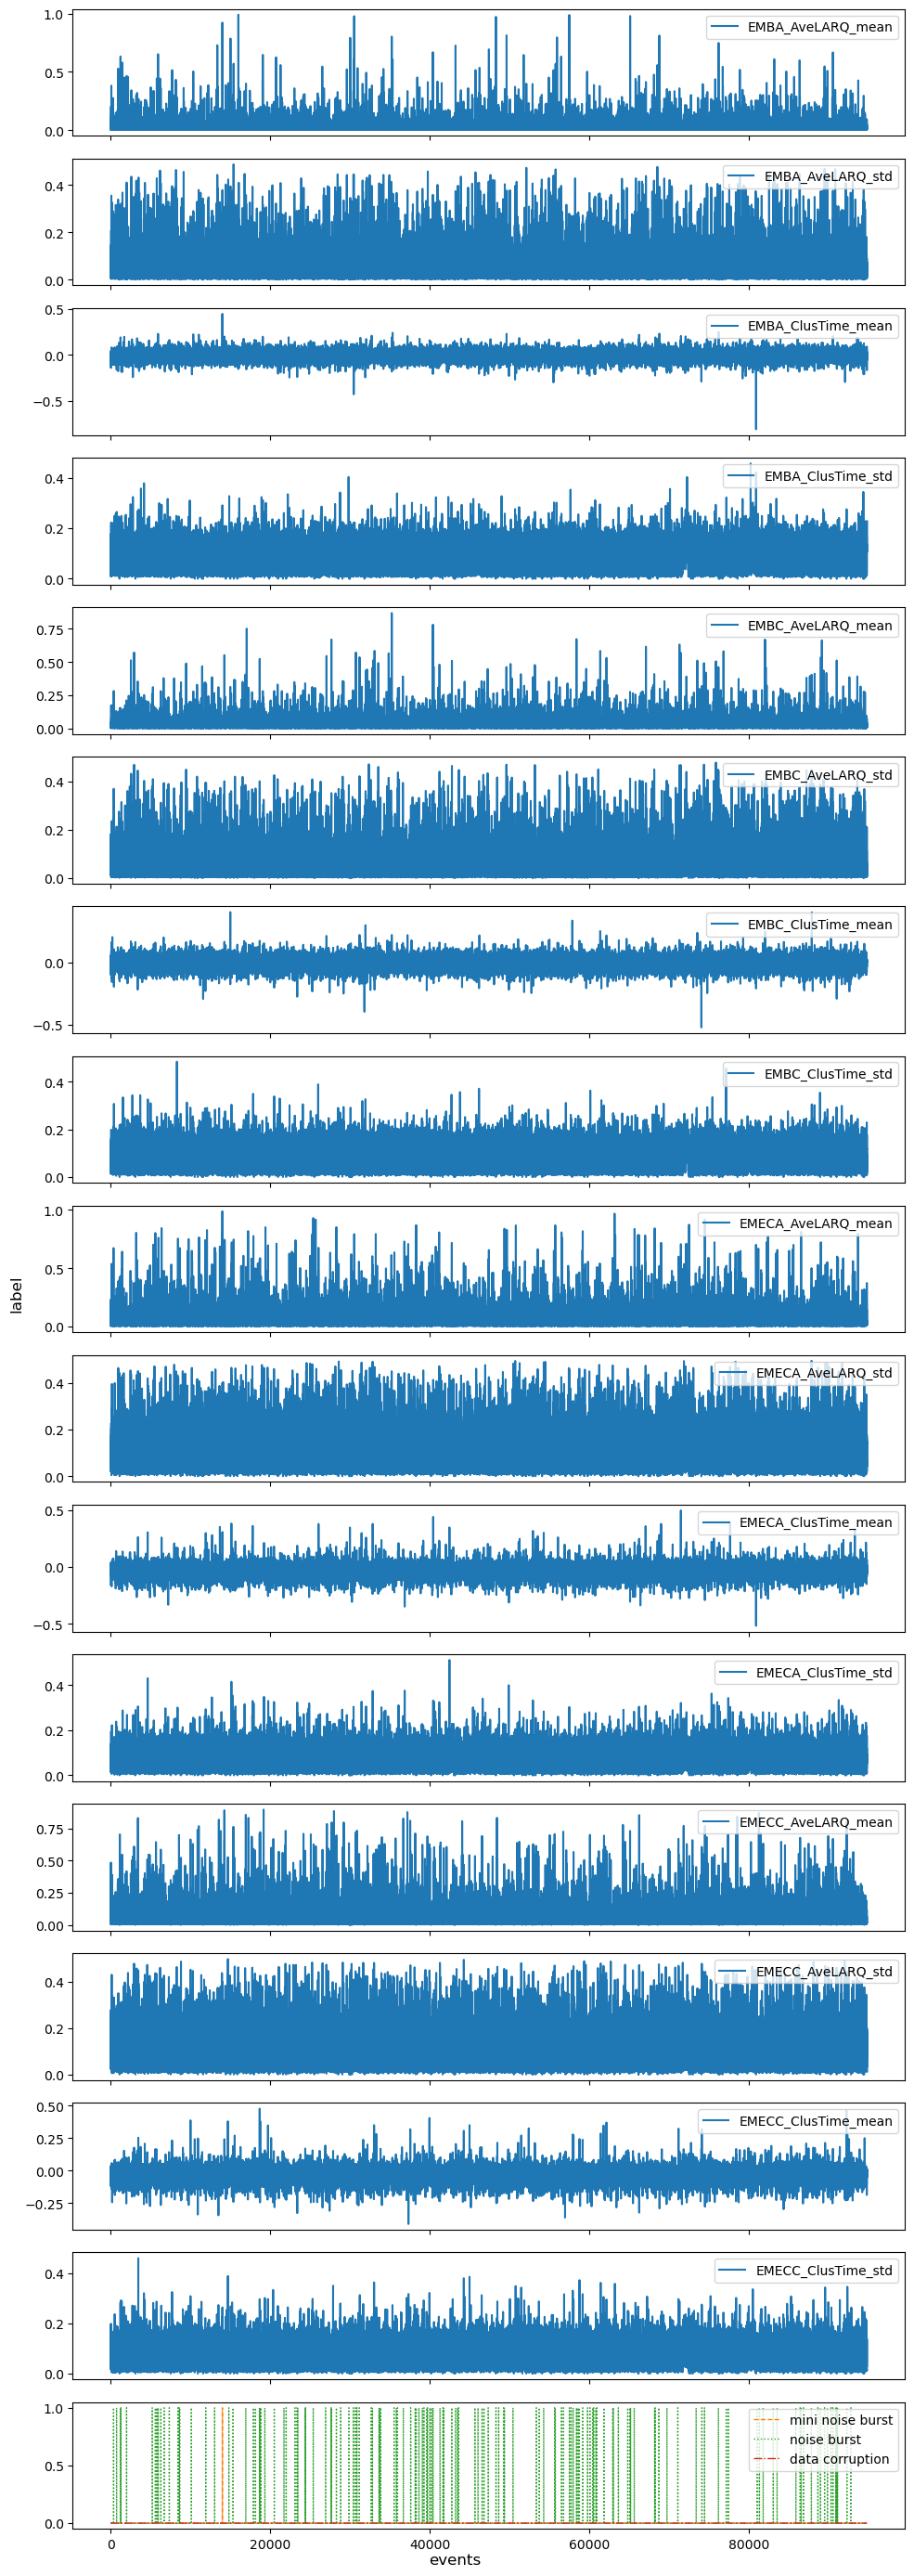

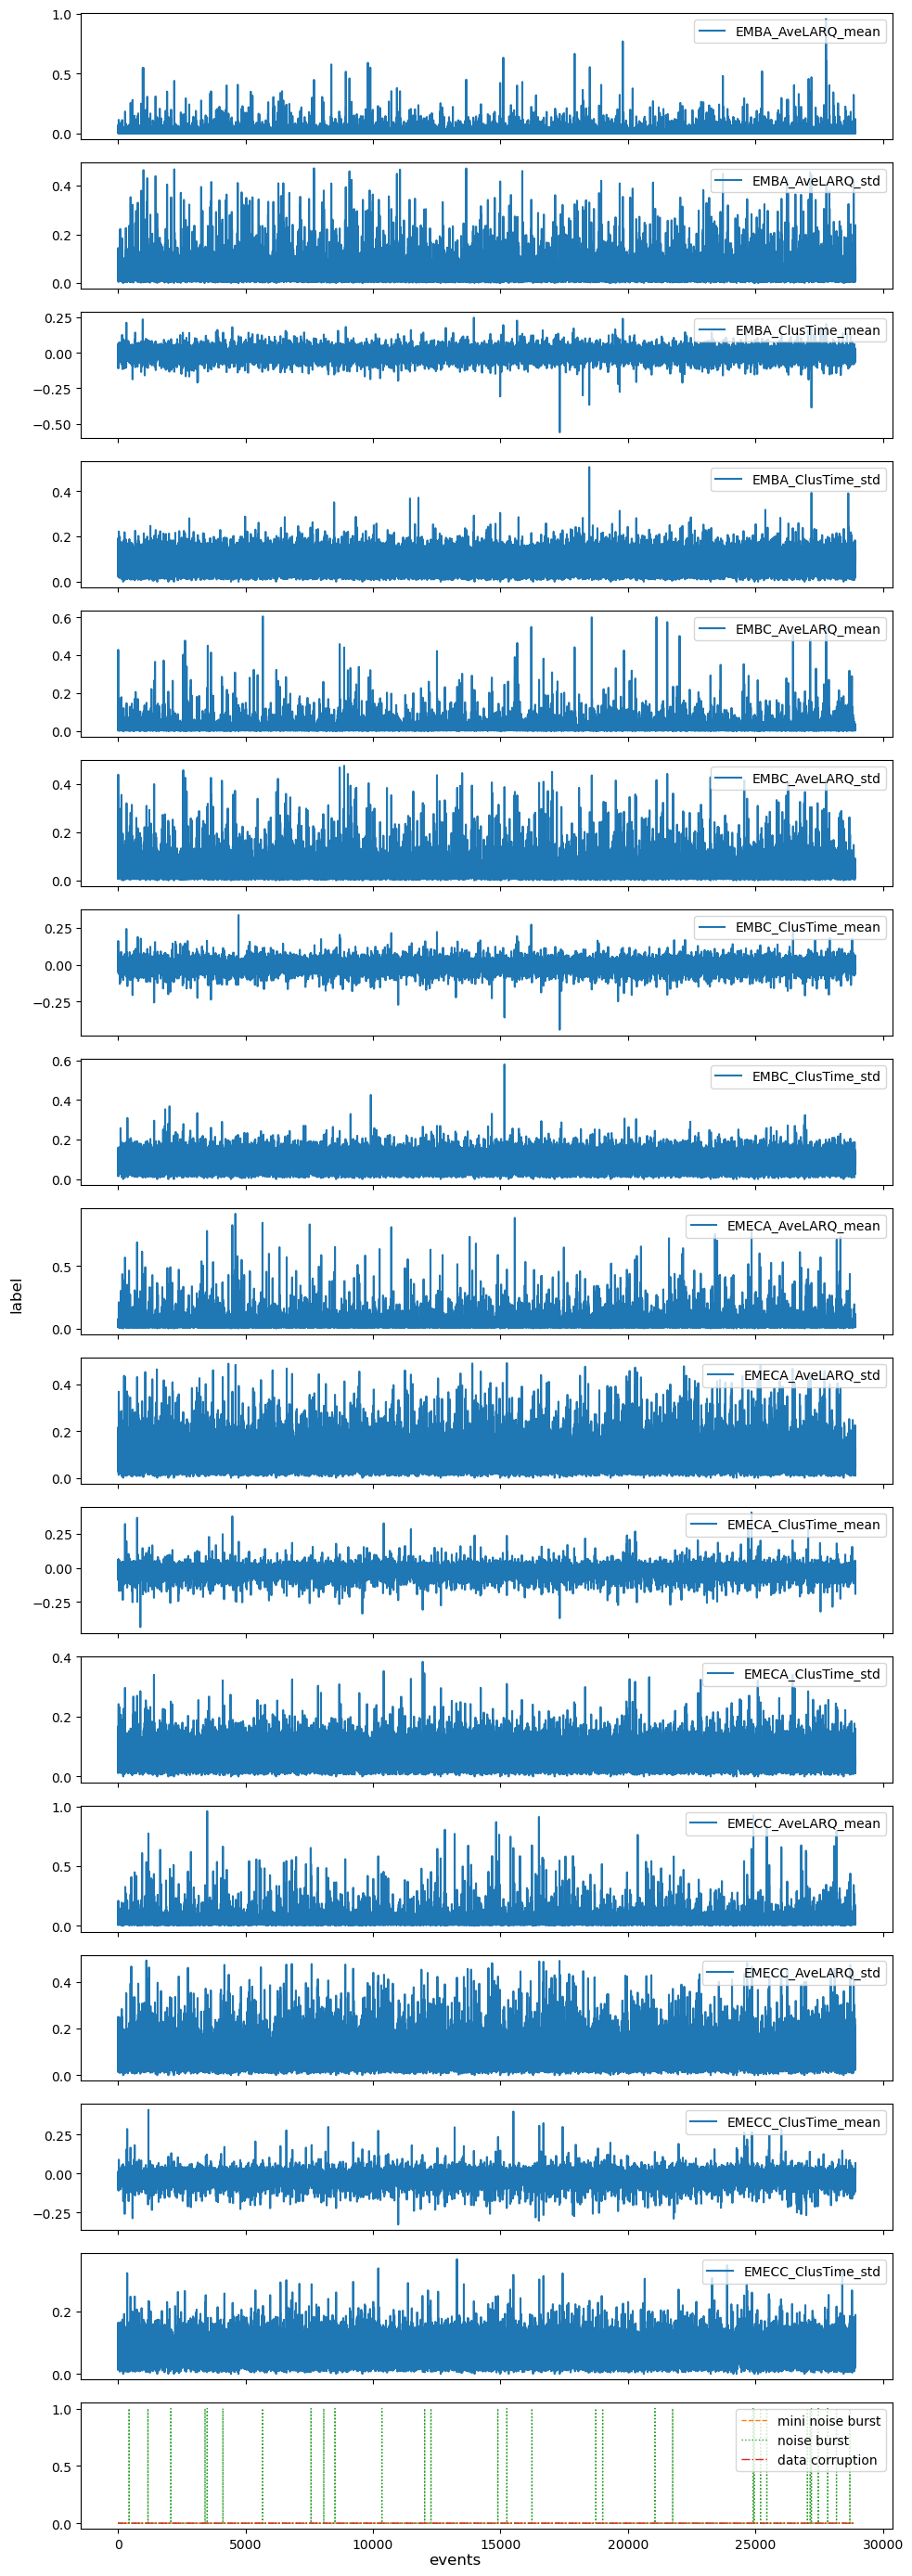

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for lb in range(5):  # iterate through lumiblocks
    fig, axs = plt.subplots(17, 1, figsize=(10, 28), sharex=True)

    for dim in range(16):  # iterate through 16 features we're using
        x_t = data[lb, dim]
        axs[dim].plot(x_t, label=f'{str(features[dim])[2:-1]}')
        axs[dim].legend(loc='upper right')
        # axs[dim].set_title(features[dim][2:])
    
    l = evt_lb[lb]      # same label for all dimensions/features
    l1 = (l==1) + 0
    l2 = (l==2) + 0
    l3 = (l==3) + 0
    axs[-1].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
    axs[-1].plot(l2, ':', linewidth=1, color='tab:green', label='noise burst')
    axs[-1].plot(l3, '-.', linewidth=1, color='tab:red', label='data corruption')
    axs[-1].legend(loc='upper right')
    fig.supylabel('label')
    fig.supxlabel('events')
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/plots/data_lb{lb}.png', dpi=300, facecolor='white')
    plt.close()



In [18]:
for f in range(len(features)):
    features[f] = str(features[f])[2:-1]
print(features)

['EMBA_AveLARQ_mean' 'EMBA_AveLARQ_std' 'EMBA_ClusTime_mean'
 'EMBA_ClusTime_std' 'EMBC_AveLARQ_mean' 'EMBC_AveLARQ_std'
 'EMBC_ClusTime_mean' 'EMBC_ClusTime_std' 'EMECA_AveLARQ_mean'
 'EMECA_AveLARQ_std' 'EMECA_ClusTime_mean' 'EMECA_ClusTime_std'
 'EMECC_AveLARQ_mean' 'EMECC_AveLARQ_std' 'EMECC_ClusTime_mean'
 'EMECC_ClusTime_std']


In [19]:
labels = {}
for i in range(5):
    labels[f'lumiblock_{i}'] = (evt_lb[i] > 0) + 0
    l = labels[f'lumiblock_{i}']
    print(len(l[l>0]), len(l[l==0]), len(l[l>0])/len(l[l==0]))


56 37770 0.0014826581943341275
52 36778 0.0014138887378323999
156 94160 0.0016567544604927783
155 94595 0.001638564406152545
31 28892 0.001072961373390558


In [20]:
print(data[0].shape)
temp = np.stack(data[0])
print(np.array(data).shape, temp.shape)

(16,)
(5, 16) (16, 37826)


In [ ]:
from sklearn.preprocessing import StandardScaler

for lb in range(5):
    
    x = np.stack(data[lb]).T
    print(x[:,0].shape)
    print(np.max(x[:,0]), np.min(x[:,0]), np.mean(x[:,0]), np.std(x[:,0]))
    y = labels[f'lumiblock_{lb}']
    print(x.shape, y.shape)
    scaler = StandardScaler()
    x_norm = scaler.fit_transform(x)
    print(np.max(x_norm[:,0]), np.min(x_norm[:,0]), np.mean(x_norm[:,0]), np.std(x_norm[:,0]))  

    plt.plot(x_norm[:,0], label='normalised')
    plt.plot(x[:,0], label='raw')
    plt.legend()
    plt.show()
    plt.close()


In [ ]:
from preprocess import normalize3

x_train = np.stack(data[0]).T
for lb in range(1,4):
    x = np.stack(data[lb]).T
    print(x.shape)
    x_train = np.concatenate((x_train, x), axis=0)
    print(x_train.shape)
x_test = np.stack(data[4]).T
y_test = np.array(labels['lumiblock_4'][:, np.newaxis])
y_test = np.repeat(y_test, repeats=16, axis=1)
print(x_test.shape)
print(y_test.shape)


In [22]:
# standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# print(max(x[0]))
# x, min_a, max_a = normalize3(x_train, min_a=None)
# print(max(x_train[0]))
# x_test, _, _ = normalize3(x_test, min_a, max_a)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

fig, axs = plt.subplots(16, 1, figsize=(10, 28), sharex=True)

for dim in range(16):  # iterate through 16 features we're using
    x_t = x_train[:, dim]   
    axs[dim].plot(x_t, label=f'{str(features[dim])[2:-1]}')
    axs[dim].legend(loc='upper right')
    # axs[dim].set_title(features[dim][2:])

# l = y_train      # same label for all dimensions/features
# l1 = (l==1) + 0
# l2 = (l==2) + 0
# l3 = (l==3) + 0
# axs[-1].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
# axs[-1].plot(l2, ':', linewidth=1, color='tab:green', label='noise burst')
# axs[-1].plot(l3, '-.', linewidth=1, color='tab:red', label='data corruption')
axs[-1].legend(loc='upper right')
fig.supylabel('label')
fig.supxlabel('events')
plt.tight_layout()
plt.show()
# plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/plots/data_lb{lb}.png', dpi=300, facecolor='white')
plt.close()


In [9]:
np.save(f'processed/ATLAS_TS/train.npy', x_train)
np.save(f'processed/ATLAS_TS/test.npy', x_test)
np.save(f'processed/ATLAS_TS/labels.npy', y_test)

In [ ]:
for lb in range(5):
    x = np.stack(data[lb]).T
    y = np.array(labels[f'lumiblock_{lb}'][:, np.newaxis])
    y = np.repeat(y, repeats=16, axis=1)
    print(x.shape)
    print(y.shape)

    np.save(f'processed/ATLAS_TS/lb_{lb}_train.npy', x)
    np.save(f'processed/ATLAS_TS/lb_{lb}_labels.npy', y)
    
    # if lb < 4:
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_train.npy', x)
    #     # np.save(f'processed/ATLAS_TS/lb_{lb}_labels.npy', y)
    # else:
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_test.npy', x)
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_labels.npy', y)